# Deep Learning: Template and Utilities
Simon Denman (s.denman@qut.edu.au)

# project complete by:
Mohan Hao (imhaom@gmail.com)

## Overview

This notebook provides a quick demo and overview of the provided utility.

Compare the SVM against when responsing to the question.

Please make sure you read the assignment brief on canvas, and check the FAQ for other information.

**Note: File paths used in this template may need to change for your local machine. Please set these based on your local file system structure.**

## Utility Functions

The following cell contains utility functions to:
* Load the data
* Vectorise the data
* Plot images
* Resize all images
* Convert images to grayscale

In [1]:
#
# Utility functions for CAB420, Assignment 1A, Q3
# Author: Simon Denman (s.denman@qut.edu.au)
#

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import keras
from keras import layers
from scipy.io import loadmat        # to load mat files
import matplotlib.pyplot as plt     # for plotting
import numpy as np                  # for reshaping, array manipulation
import cv2                          # for colour conversion
import tensorflow as tf             # for bulk image resize
import keras
from sklearn.discriminant_analysis import StandardScaler
from sklearn.svm import SVC
from time import process_time
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
import seaborn as sns
# Load data for Q3
#  train_path: path to training data mat file
#  test_path:  path to testing data mat file
#
#  returns:    arrays for training and testing X and Y data
#
def load_data(train_path, test_path):

    # load files
    train = loadmat(train_path)
    test = loadmat(test_path)

    # transpose, such that dimensions are (sample, width, height, channels), and divide by 255.0
    train_X = np.transpose(train['train_X'], (3, 0, 1, 2)) / 255.0
    train_Y = train['train_Y']
    # change labels '10' to '0' for compatability with keras/tf. The label '10' denotes the digit '0'
    train_Y[train_Y == 10] = 0
    train_Y = np.reshape(train_Y, -1)

    # transpose, such that dimensions are (sample, width, height, channels), and divide by 255.0
    test_X = np.transpose(test['test_X'], (3, 0, 1, 2)) / 255.0
    test_Y = test['test_Y']
    # change labels '10' to '0' for compatability with keras/tf. The label '10' denotes the digit '0'
    test_Y[test_Y == 10] = 0
    test_Y = np.reshape(test_Y, -1)

    # return loaded data
    return train_X, train_Y, test_X, test_Y

# vectorise an array of images, such that the shape is changed from {samples, width, height, channels} to
# (samples, width * height * channels)
#   images: array of images to vectorise
#
#   returns: vectorised array of images
#
def vectorise(images):
    # use numpy's reshape to vectorise the data
    return np.reshape(images, [len(images), -1])

# Plot some images and their labels. Will plot the first 100 samples in a 10x10 grid
#  x: array of images, of shape (samples, width, height, channels)
#  y: labels of the images
#
def plot_images(x, y):
    fig = plt.figure(figsize=[15, 18])
    for i in range(100):
        ax = fig.add_subplot(10, 10, i + 1)
        ax.imshow(x[i,:])
        ax.set_title(y[i])
        ax.axis('off')

# Resize an array of images
#  images:   array of images, of shape (samples, width, height, channels)
#  new_size: tuple of the new size, (new_width, new_height)
#
#  returns:  resized array of images, (samples, new_width, new_height, channels)
#
def resize(images, new_size):
    # tensorflow has an image resize funtion that can do this in bulk
    # note the conversion back to numpy after the resize
    return tf.image.resize(images, new_size).numpy()
          
# Convert images to grayscale
#   images:  array of colour images to convert, of size (samples, width, height, 3)
#
#   returns: array of converted images, of size (samples, width, height, 1)
#
def convert_to_grayscale(images):
    # storage for converted images
    gray = []
    # loop through images
    for i in range(len(images)):
        # convert each image using openCV
        gray.append(cv2.cvtColor(images[i,:], cv2.COLOR_BGR2GRAY))
    # pack converted list as an array and return
    return np.expand_dims(np.array(gray), axis = -1)

## Utility Function Demonstration

The following presents a brief demonstration of the utility functions. These portions of code do not form part of the template, or solution, and could be commented out/removed.

### Data Loading

Load the data, and visualise images.

(1000, 32, 32, 3)
(1000,)
(10000, 32, 32, 3)
(10000,)


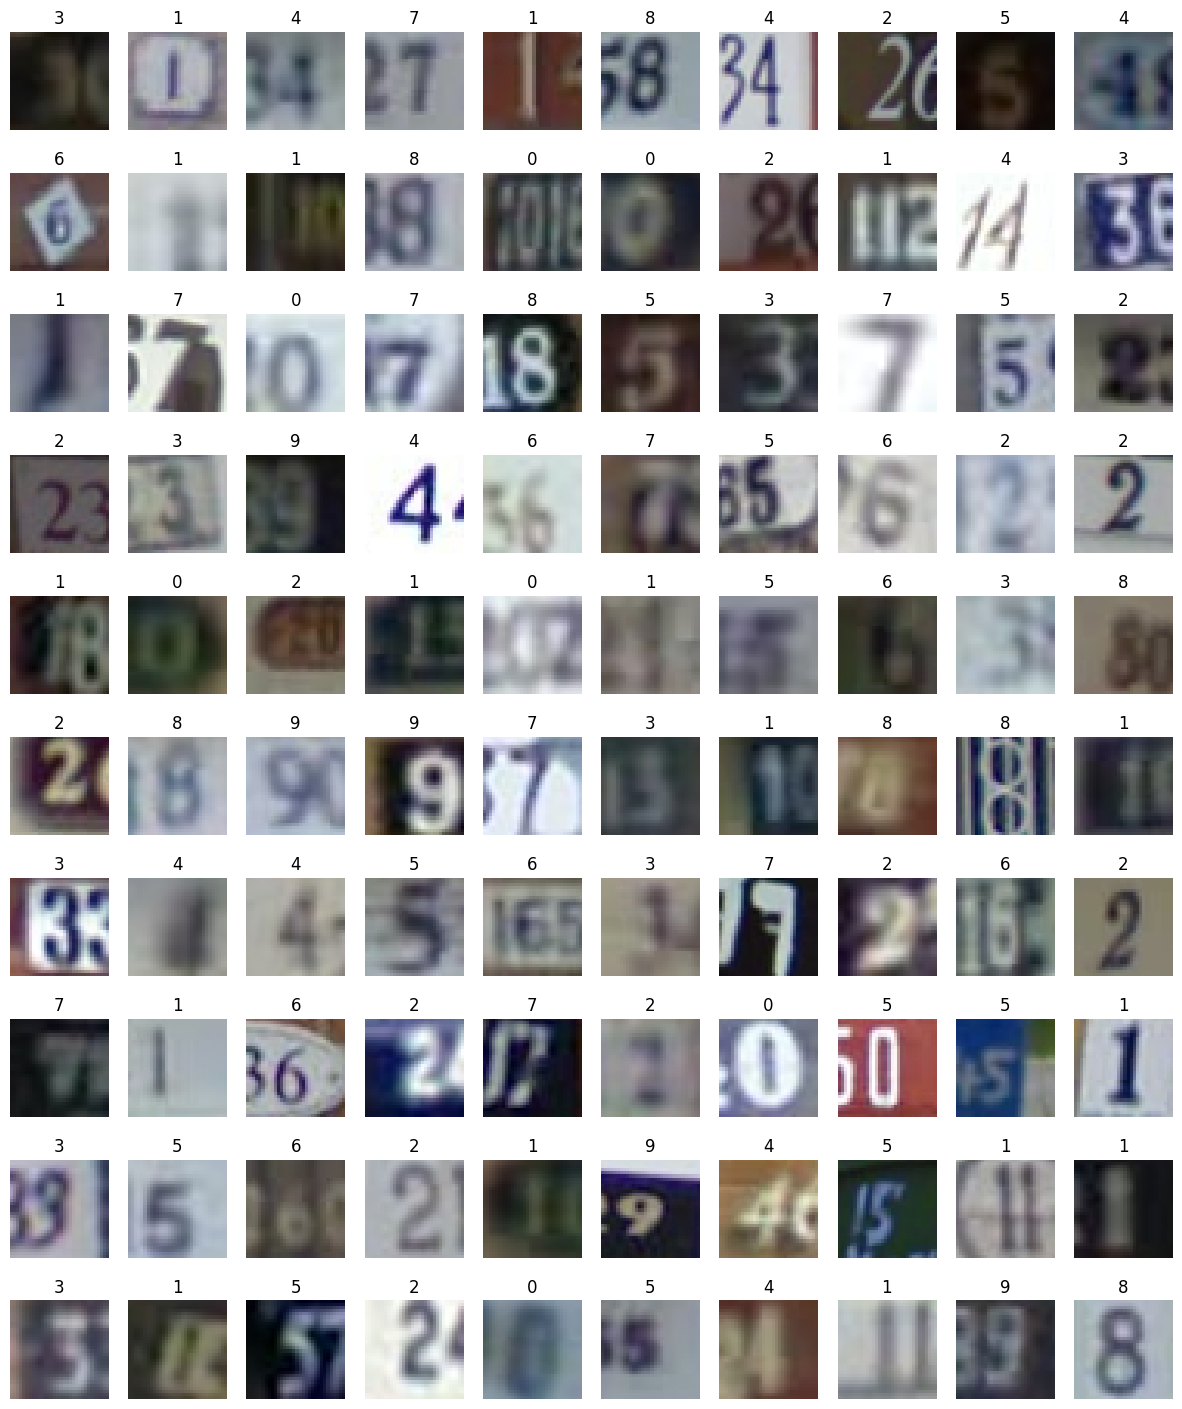

In [2]:
train_X, train_Y, test_X, test_Y = load_data('/home/imhaom/CAB420_Machine_Learning/Assignment 1A/Q3/q3_train.mat', '/home/imhaom/CAB420_Machine_Learning/Assignment 1A/Q3/q3_test.mat')

# check shape of data
print(train_X.shape)
print(train_Y.shape)
print(test_X.shape)
print(test_Y.shape)

# visualise images as a sanity check
plot_images(train_X, train_Y)

### Vectorise Data

To train an SVM, each sample needs to be a vector rather than an image.

In [3]:
train_vector_X = vectorise(train_X)
test_vector_X = vectorise(test_X)
print(train_vector_X.shape)
print(test_vector_X.shape)

(1000, 3072)
(10000, 3072)


### Conversion and Resizing

You may wish to either:
* Resize images
* Convert images to grayscale

Two functions are provided to do this, and can be used in combination as shown below.

(1000, 20, 20, 1)


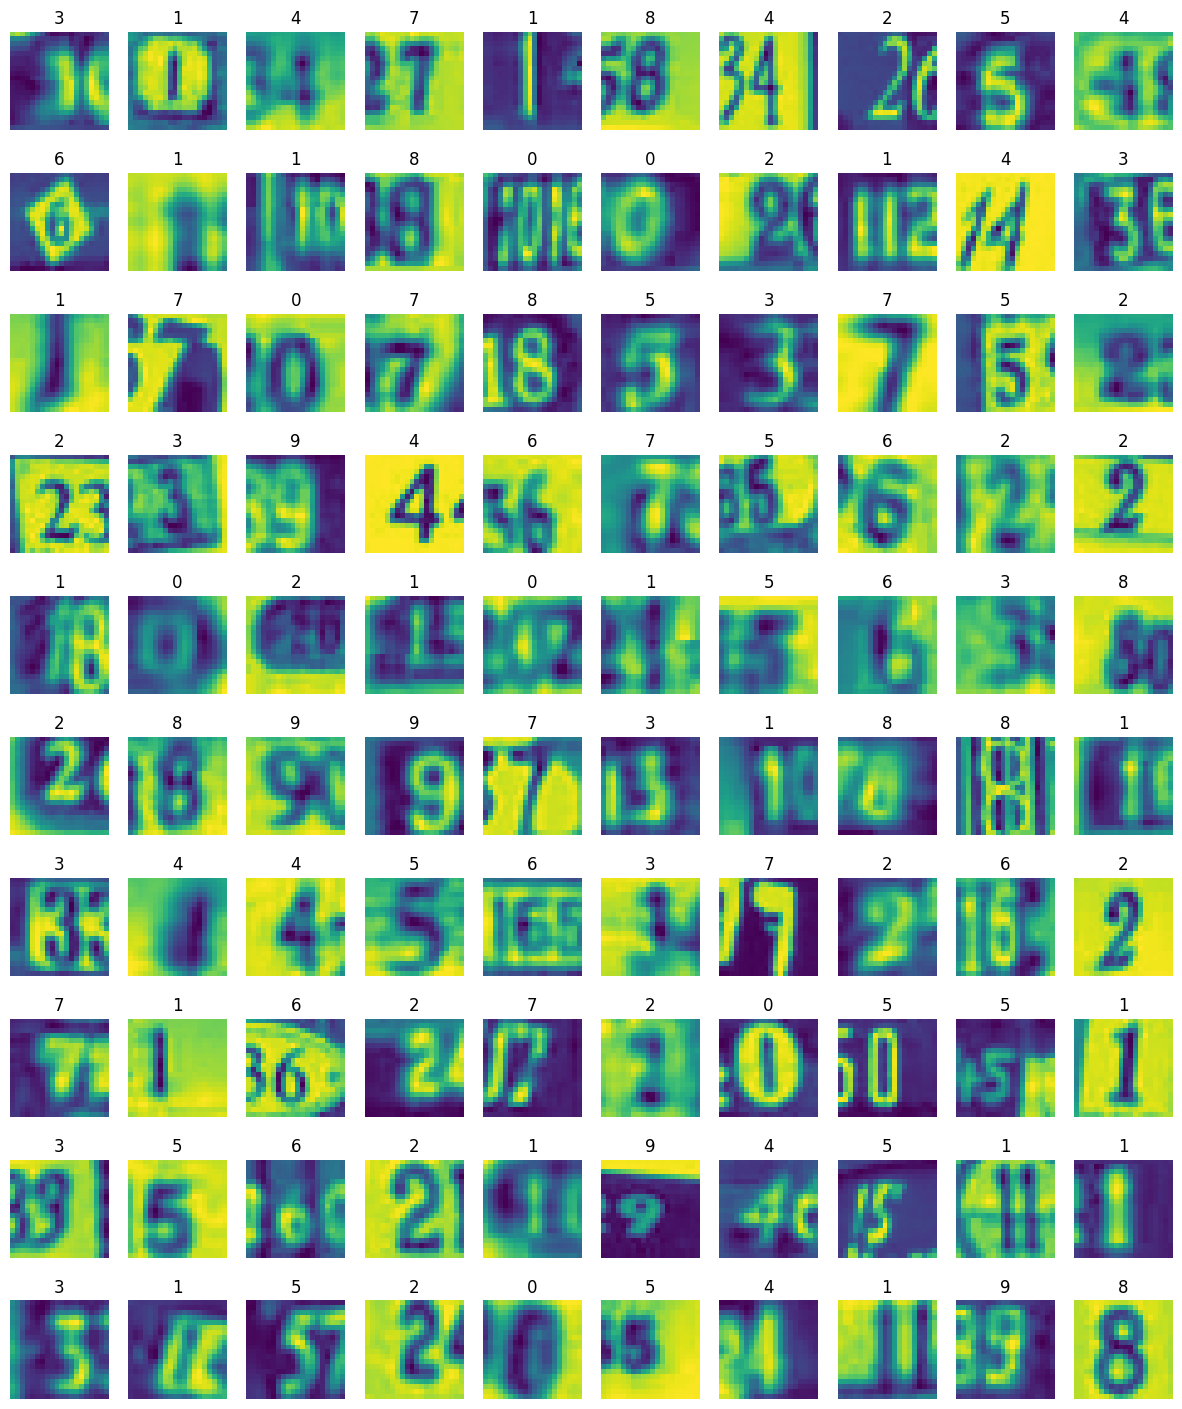

In [4]:
train_X_small = convert_to_grayscale(resize(train_X, (20, 20)))
print(train_X_small.shape)
plot_images(train_X_small, train_Y)

### Measuring Time

There are a lot of ways to measure time in python. A simple one is to use ``process_time`` within the ``time`` package. This will simply measure the ellapsed process time in seconds. We can use ths to measure individual parts of our code as follows:

In [5]:
# import process_time
from time import process_time

# get a start time
time_1 = process_time()

# do some stuff, in this case we'll just load some data
train_X, train_Y, test_X, test_Y = load_data('/home/imhaom/CAB420_Machine_Learning/Assignment 1A/Q3/q3_train.mat', '/home/imhaom/CAB420_Machine_Learning/Assignment 1A/Q3/q3_test.mat')

# get the end time of our first lot of "stuff"
time_2 = process_time()

# do some other stuff
train_X_small = convert_to_grayscale(resize(train_X, (20, 20)))

# get the end time of our first lot of "stuff"
time_3 = process_time()

# the time it took to do "our stuff" is just the difference between the start and end times
print('Time to load data:   %f seconds' % (time_2 - time_1))
print('Time to resize data: %f seconds' % (time_3 - time_2))

Time to load data:   0.218410 seconds
Time to resize data: 0.012351 seconds


## Question 3 Template

The following provides a starting point for your solution. It trains the SVM that you are to compare your trained DCNNs against, and measures the time taken to train this SVM, and to perform inference with the train and test sets.

This does not measure the performance of the SVM - you will need to implement this as part of your solution.

Training Time: 1.163356
Inference Time (training set): 0.717458
Inference Time (testing set): 7.170418
              precision    recall  f1-score   support

           0       0.22      0.30      0.25       711
           1       0.37      0.50      0.43      1894
           2       0.39      0.36      0.37      1497
           3       0.36      0.33      0.34      1141
           4       0.34      0.31      0.32      1035
           5       0.35      0.32      0.34       892
           6       0.32      0.24      0.28       758
           7       0.38      0.30      0.34       789
           8       0.32      0.30      0.31       683
           9       0.38      0.29      0.33       600

    accuracy                           0.35     10000
   macro avg       0.34      0.33      0.33     10000
weighted avg       0.35      0.35      0.35     10000

Weighted F1 Score: 0.3463405029580538


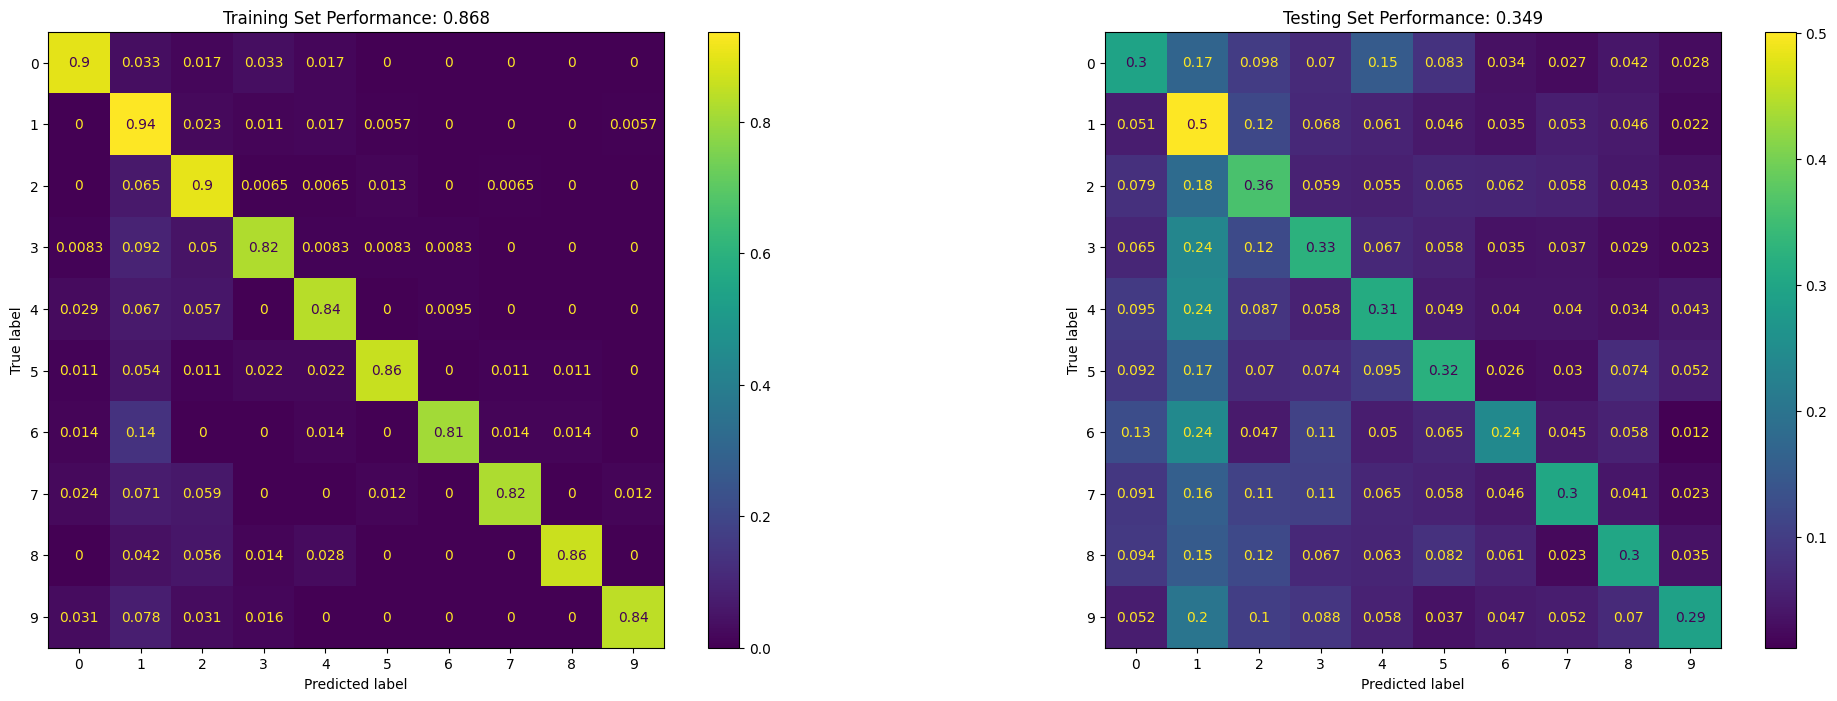

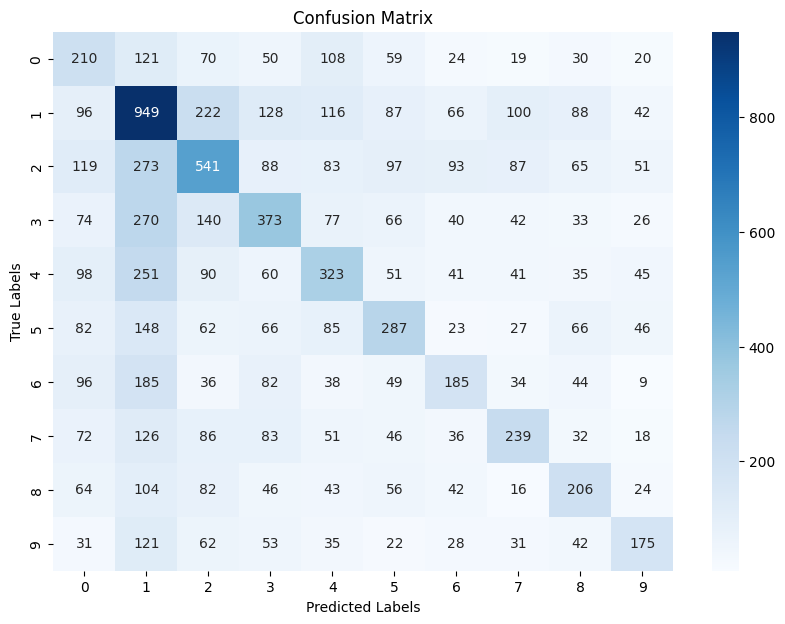

Classification Report:
               precision    recall  f1-score   support

           0       0.22      0.30      0.25       711
           1       0.37      0.50      0.43      1894
           2       0.39      0.36      0.37      1497
           3       0.36      0.33      0.34      1141
           4       0.34      0.31      0.32      1035
           5       0.35      0.32      0.34       892
           6       0.32      0.24      0.28       758
           7       0.38      0.30      0.34       789
           8       0.32      0.30      0.31       683
           9       0.38      0.29      0.33       600

    accuracy                           0.35     10000
   macro avg       0.34      0.33      0.33     10000
weighted avg       0.35      0.35      0.35     10000



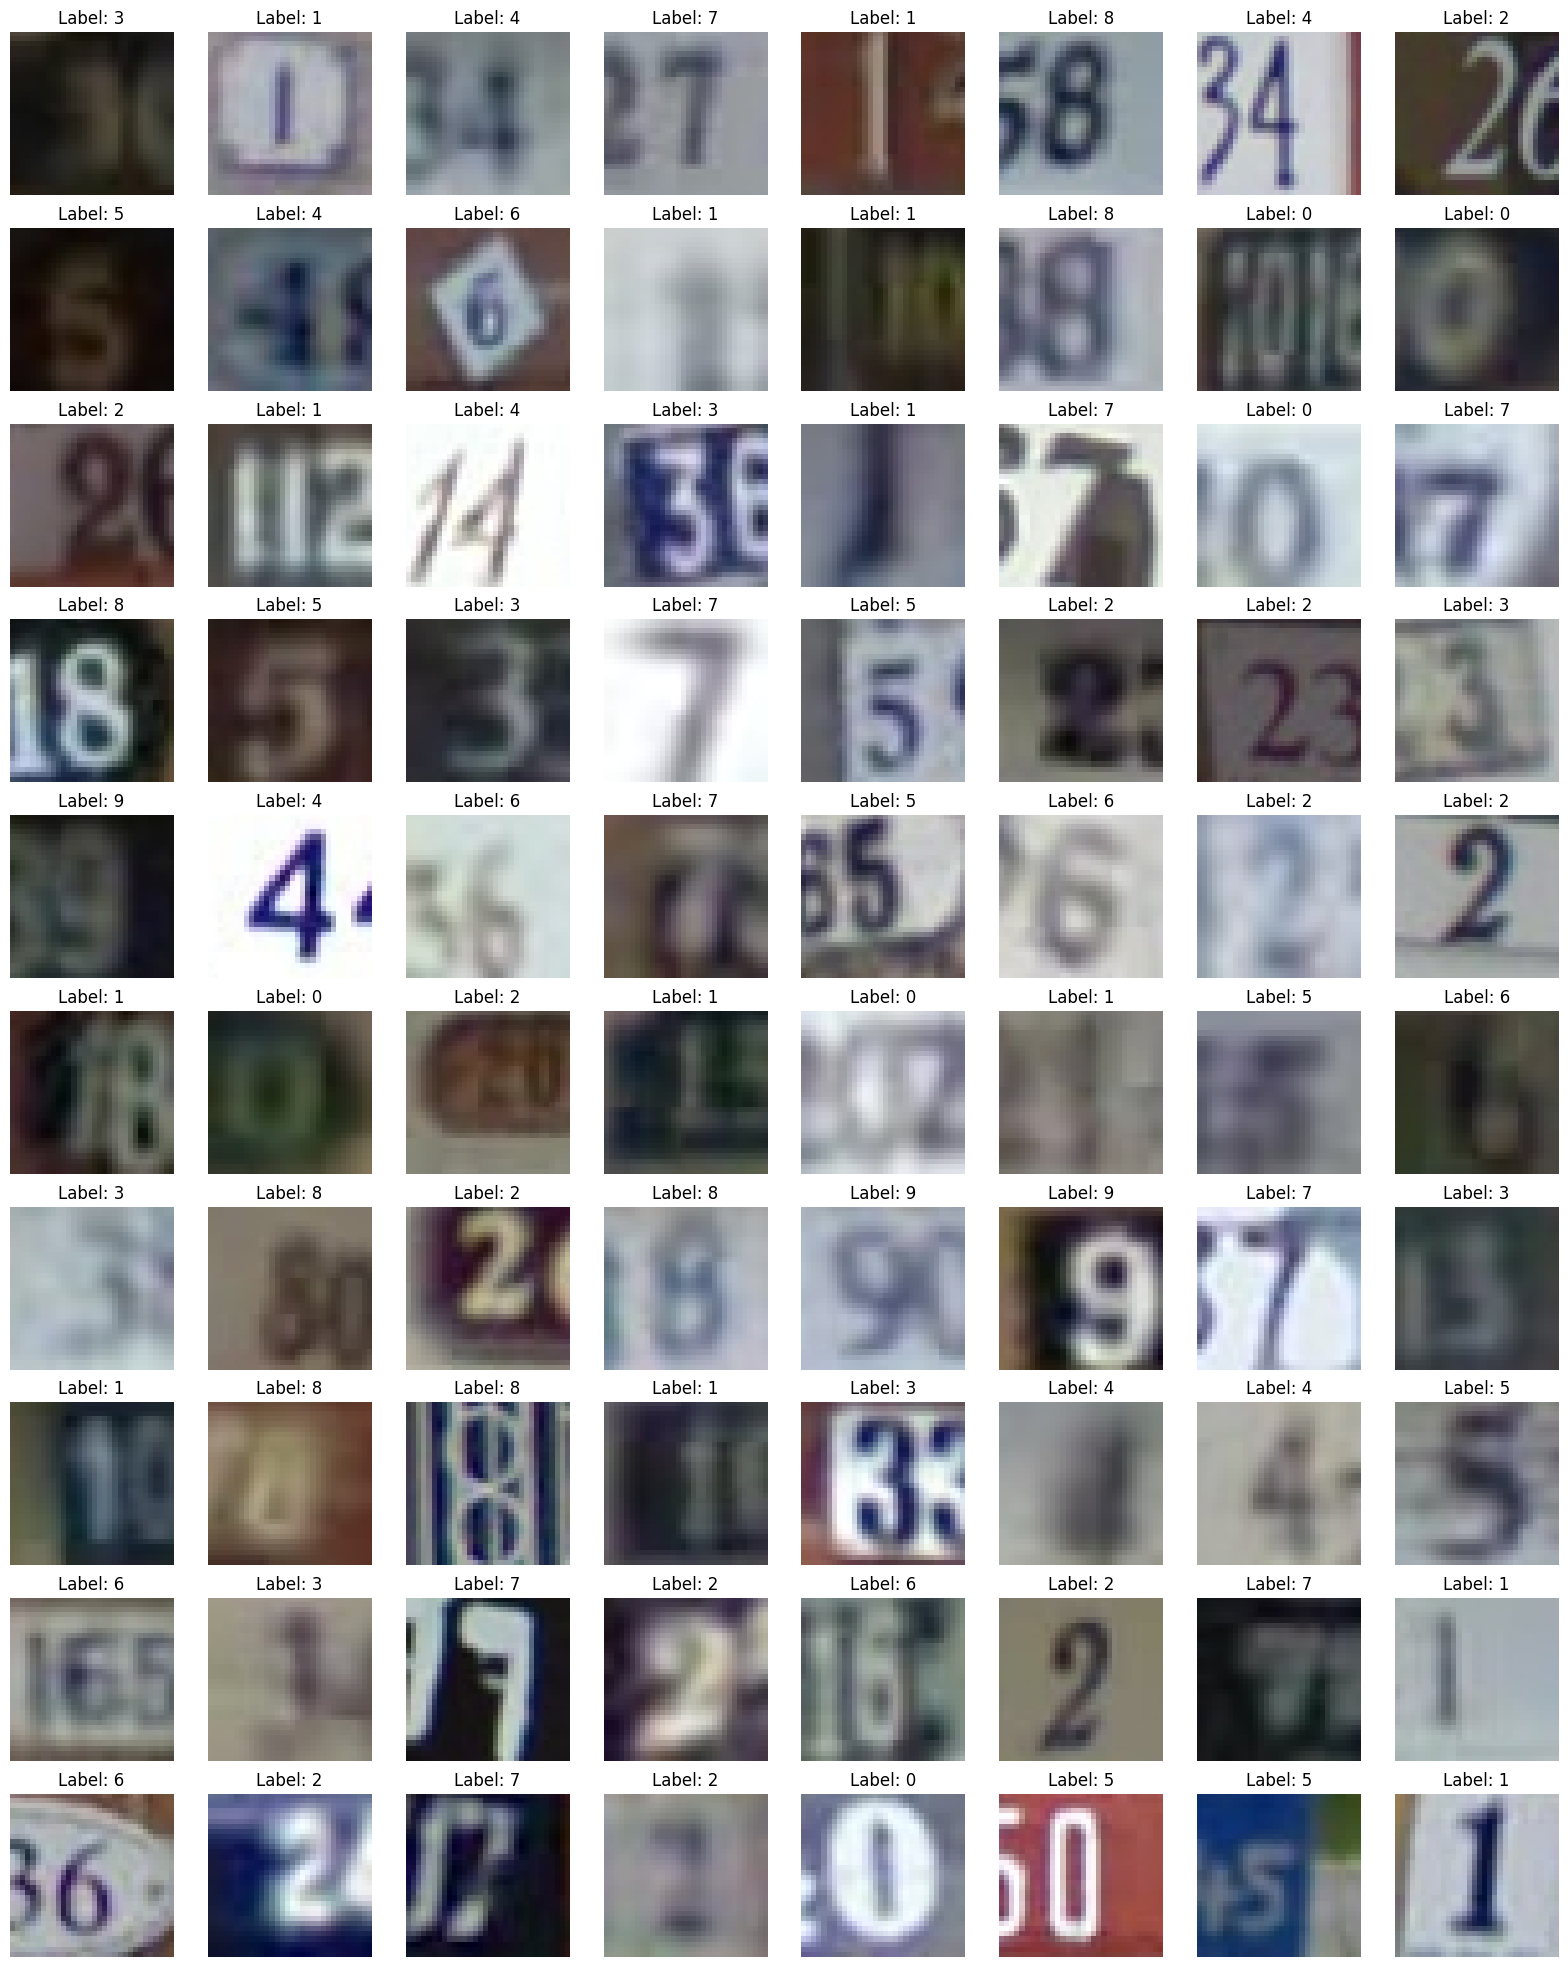

In [6]:
# load data
train_X, train_Y, test_X, test_Y = load_data('/home/imhaom/CAB420_Machine_Learning/Assignment 1A/Q3/q3_train.mat', '/home/imhaom/CAB420_Machine_Learning/Assignment 1A/Q3/q3_test.mat')

# you may want to split the data to obtain a validation set. This is not needed, but if you wish to you would do
# this here

# any resize, colour change, etc, would go here

# vectorise data
# If you do any resize, reshape, etc of the data prior to putting this into your DCNN, change this code to 
# vectorise that verison of the data. The same data should be used by all models for a fair comparison; though
# you will only vectorise the data for the SVM (i.e. the DCNN will get the data as images).
# vectorise data
# If you do any resize, reshape, etc of the data prior to putting this into your DCNN, change this code to 
# vectorise that verison of the data. The same data should be used by all models for a fair comparison; though
# you will only vectorise the data for the SVM (i.e. the DCNN will get the data as images).
# train_vector_X = vectorise(train_X)
# test_vector_X = vectorise(test_X)

# train the SVM
# measure the start time of training
svm_train_start = process_time()
# run the training - note that you don't need to change any parameters here except potentially for the input data is you 
# resize, change colour, etc
svm = SVC(C = 1.0, kernel = 'linear').fit(train_vector_X, train_Y)
# record the end time of the training
svm_train_end = process_time()
# predict on the training set
train_predictions = svm.predict(train_vector_X)
# measure of the time of the training set prediction
svm_train_pred_end = process_time()
# predict on the test set
test_predictions = svm.predict(test_vector_X)
# measure the end time on the prediction of the test set
svm_test_pred_end = process_time()

# check how long the SVM took to train
svm_train_time = svm_train_end - svm_train_start
# check how long the SVM took to perform inference on the training set
svm_inference_train_time = svm_train_pred_end - svm_train_end
# check how long the SVM took to perform inference on the testing set
svm_inference_test_time = svm_test_pred_end - svm_train_pred_end
# print some times
print('Training Time: %f\nInference Time (training set): %f\nInference Time (testing set): %f' % \
      (svm_train_time, svm_inference_train_time, svm_inference_test_time))

# evaluate SVM
# here you can insert whatever evaluation metrics you feel are appropriate, though F1 and a confusion matrix would be a fair
# option
  
def eval_model(model, X_train, Y_train, X_test, Y_test):
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)
    fig = plt.figure(figsize=[25, 8])
    ax = fig.add_subplot(1, 2, 1)
    ConfusionMatrixDisplay.from_predictions(Y_train, train_predictions, normalize='true', ax=ax)
    ax.set_title('Training Set Performance: %1.3f' % (sum(train_predictions == Y_train)/len(Y_train)))
    ax = fig.add_subplot(1, 2, 2)
    ConfusionMatrixDisplay.from_predictions(Y_test, test_predictions, normalize='true', ax=ax)
    ax.set_title('Testing Set Performance: %1.3f' % (sum(test_predictions == Y_test)/len(Y_test)))
    print(classification_report(Y_test, test_predictions))
    f1_weighted = f1_score(Y_test, test_predictions, average='weighted')
    print(f"Weighted F1 Score: {f1_weighted}")

def plot_images_svm(images, labels):
    fig = plt.figure(figsize=[20, 25])
    for i in range(80):  # Adjust this to plot the number of images you desire
        ax = fig.add_subplot(10, 8, i + 1)  # Changed from 10, 10 to 10, 8 for 80 images
        img = images[i].reshape(32, 32, 3)  # Corrected shape for color images
        ax.imshow(img)  # No need to specify cmap='gray' for color images
        ax.set_title(labels[i])
        ax.axis('off')
      
eval_model(svm, train_vector_X, train_Y, test_vector_X, test_Y)

# Generate and visualize confusion matrix
val_predictions = svm.predict(test_vector_X)
cm = confusion_matrix(test_Y, val_predictions)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

print("Classification Report:\n", classification_report(test_Y, val_predictions))

# Prepare images and labels correctly
plot_images_svm(train_X[:80], [f'Label: {label}' for label in train_Y[:80]])

In [7]:
# develop, evaluate and compare DCNNs
#
# You should create one DCNN which you will train from scratch, and then add augmentation to this and train it again.
# Use whatever augmentation you feel is appropraite.
#
# Define the DCNN architecture

from sklearn.utils import class_weight
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, models, regularizers
from sklearn.utils import compute_class_weight

data_augmentation = keras.Sequential([
  layers.RandomFlip("horizontal"),
  layers.RandomRotation(0.1),
  layers.RandomZoom(0.05),
  layers.RandomContrast(0.05),
  #layers.RandomBrightness(0.05)
])

def CreateVGGModel(num_classes):
    inputs = layers.Input(shape=(32, 32, 3), name='img')
    # Regularizer
    l2_reg = regularizers.l2(1e-4)
    x = inputs  # No augmentation applied

    x = layers.Conv2D(32, (3, 3), padding='same', activation='relu', kernel_regularizer=l2_reg)(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPool2D((2, 2), strides=(2, 2))(x)
    x = layers.Dropout(0.2)(x)  # Increased dropout
    
    x = layers.Conv2D(64, (3, 3), padding='same', activation='relu', kernel_regularizer=l2_reg)(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPool2D((2, 2), strides=(2, 2))(x)
    x = layers.Dropout(0.3)(x)

    # Fully connected layers
    x = layers.Flatten()(x)
    x = layers.Dense(256, activation='relu', kernel_regularizer=l2_reg)(x)
    x = layers.Dropout(0.4)(x)

    outputs = layers.Dense(num_classes, activation='softmax')(x)

    model_vgg = models.Model(inputs=inputs, outputs=outputs, name='vgg_simplified')
    return model_vgg

# Create the model
def eval_model(model, history, x_train, y_train, x_test, y_test):
    # Generate predictions
    test_predictions = model.predict(x_test)
    test_pred_classes = np.argmax(test_predictions, axis=1)

    # Convert one-hot encoded labels back to class indices if necessary
    if y_test.shape[1] > 1:
        y_test_indices = np.argmax(y_test, axis=1)
    else:
        y_test_indices = y_test
    
    # Confusion matrix
    confusion_mtx = confusion_matrix(y_test_indices, test_pred_classes)
    plt.figure(figsize=(10, 8))
    sns.heatmap(confusion_mtx, annot=True, fmt='g')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()
    
    # Plot training and validation loss and accuracy
    plt.figure(figsize=(20, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history['loss'], label='Training Loss')
    plt.plot(history['val_loss'], label='Validation Loss')
    plt.title('Loss')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(history['accuracy'], label='Training Accuracy')
    plt.plot(history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy')
    plt.legend()
    plt.show()
    
    # Classification report
    print(classification_report(y_test_indices, test_pred_classes))
 
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor the validation loss
    patience=20,         # Stop training after 20 epochs without improvement in val_loss
    restore_best_weights=True  # Restore model weights from the epoch with the best value of the monitored metric
)     

num_classes = 10
train_X_norm = train_X.reshape((-1, 32, 32, 3)).astype('float32') / 255.0
test_X_norm = test_X.reshape((-1, 32, 32, 3)).astype('float32') / 255.0
train_Y_cat = to_categorical(train_Y, num_classes)
test_Y_cat = to_categorical(test_Y, num_classes)

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_Y),
    y=train_Y.flatten()
)
class_weight_dict = dict(enumerate(class_weights))
print(class_weight_dict)

{0: 1.6666666666666667, 1: 0.5714285714285714, 2: 0.6535947712418301, 3: 0.8333333333333334, 4: 0.9523809523809523, 5: 1.075268817204301, 6: 1.36986301369863, 7: 1.1764705882352942, 8: 1.3888888888888888, 9: 1.5625}


Model: "vgg_simplified"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ img (InputLayer)                │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     1,048,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,071,178 (4.09 MB)

 Trainable params: 1,070,986 (4.09 MB)

 Non-trainable params: 192 (768.00 B)

None
Epoch 1/100
 1/32 ━━━━━━━━━━━━━━━━━━━━ 2:44 5s/step - accuracy: 0.0000e+00 - loss: 2.5059

I0000 00:00:1744433233.393144  189784 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 136ms/step - accuracy: 0.0774 - loss: 2.4167 - val_accuracy: 0.0789 - val_loss: 2.3717
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.1120 - loss: 2.3470 - val_accuracy: 0.0789 - val_loss: 2.3716
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2089 - loss: 2.2467 - val_accuracy: 0.0789 - val_loss: 2.3761
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2692 - loss: 2.1019 - val_accuracy: 0.0789 - val_loss: 2.3951
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4158 - loss: 1.7753 - val_accuracy: 0.1035 - val_loss: 2.3926
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5658 - loss: 1.3706 - val_accuracy: 0.0789 - val_loss: 2.4089
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6928 - loss: 1.0157 - val_accuracy: 0.0790 - val_loss: 2.3730
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7739 - loss: 0.8416 - val_accuracy: 0.0795 - val

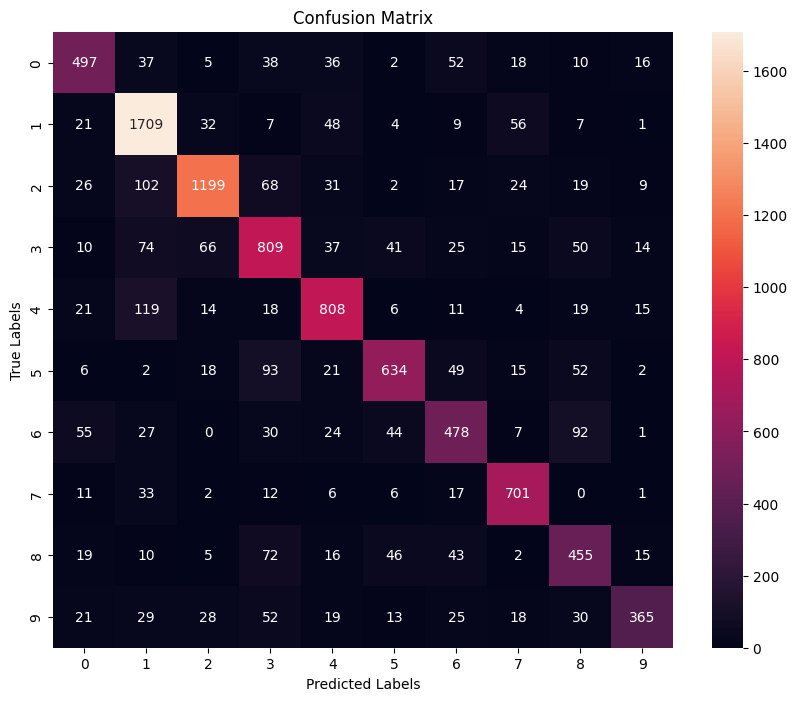

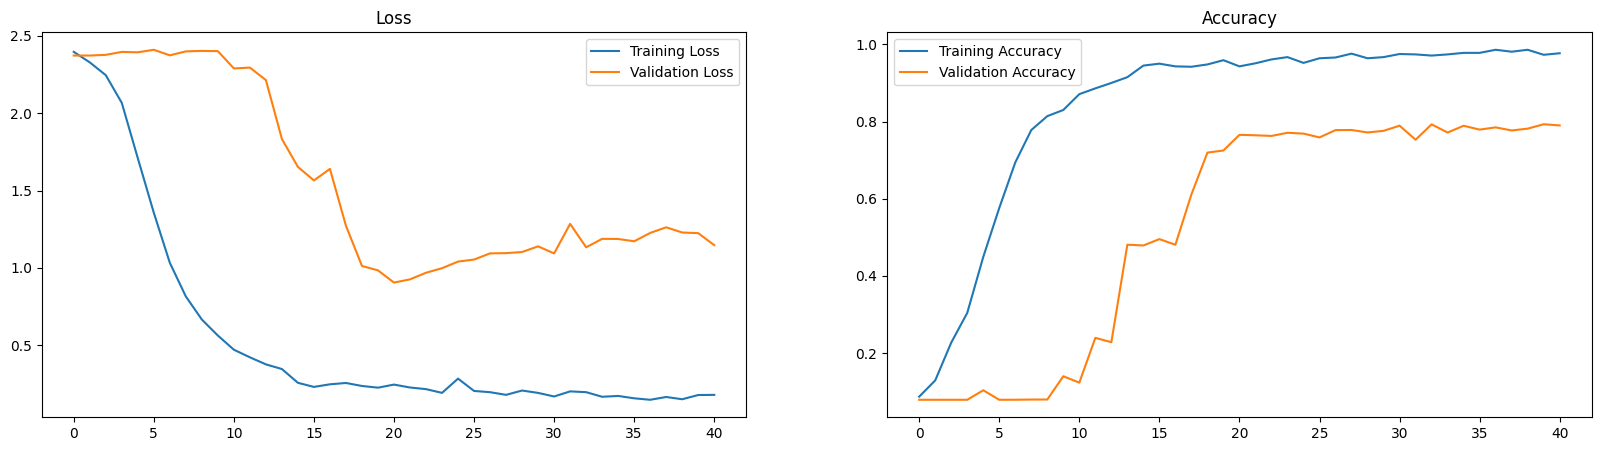

              precision    recall  f1-score   support

           0       0.72      0.70      0.71       711
           1       0.80      0.90      0.85      1894
           2       0.88      0.80      0.84      1497
           3       0.67      0.71      0.69      1141
           4       0.77      0.78      0.78      1035
           5       0.79      0.71      0.75       892
           6       0.66      0.63      0.64       758
           7       0.82      0.89      0.85       789
           8       0.62      0.67      0.64       683
           9       0.83      0.61      0.70       600

    accuracy                           0.77     10000
   macro avg       0.76      0.74      0.75     10000
weighted avg       0.77      0.77      0.76     10000



In [8]:
batch_size = 32
# Create TensorFlow Dataset objects for both the training and testing sets
train_dataset = tf.data.Dataset.from_tensor_slices((train_X_norm, train_Y_cat))
test_dataset = tf.data.Dataset.from_tensor_slices((test_X_norm, test_Y_cat))

# You can also batch and prefetch the datasets to improve training speed
train_dataset = train_dataset.shuffle(1000).batch(batch_size).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE)

# Initialize the model
model_vgg = CreateVGGModel(10)
print(model_vgg.summary())
# Compile the model with the appropriate loss function for categorical classification
model_vgg.compile(
    optimizer=keras.optimizers.Adam(),  # Create a new instance of Adam optimizer
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model and track training time
start_time = process_time()
# Train the model, passing the class_weight_dict to the fit method
history_vgg = model_vgg.fit(
    train_dataset,
    validation_data=test_dataset,
    epochs=100,
    class_weight=class_weight_dict,
    callbacks=[early_stopping],
    verbose=1
)

end_time = process_time()
training_time = end_time - start_time
print(f"Training Time: {training_time}")

train_infer_start_time = process_time()
train_predictions = model_vgg.predict(train_dataset)
train_infer_end_time = process_time()

# Training set inference time calculation
train_inference_time = train_infer_end_time - train_infer_start_time
print(f"Inference Time on Training Set: {train_inference_time}")

# Start timing for inference on testing dataset
test_infer_start_time = process_time()
test_predictions = model_vgg.predict(test_dataset)
test_infer_end_time = process_time()

# Testing set inference time calculation
test_inference_time = test_infer_end_time - test_infer_start_time
print(f"Inference Time on Testing Set: {test_inference_time}")


eval_model(model_vgg, history_vgg.history, train_X_norm, train_Y_cat, test_X_norm, test_Y_cat)

# model = create_cnn(num_classes, use_augmentation=True)

# # Compile the model
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# # Assuming you have training and validation datasets defined
# # Train the model
# history = model.fit(train_dataset, epochs=100, callbacks=[early_stopping], validation_data=test_dataset)
# eval_model(model, history.history, train_X_norm, train_Y_cat, test_X_norm, test_Y_cat)

# plot_images_dcnn(test_X_norm, test_dataset, model_vgg, num_images=80)
# For your DCNN design, feel free to borrow networks from pracs and lecture examples. The network does not need to be
# overly complex, but you should briefly explain your selection of this model. You should avoid networks so simple 
# that they perform very badly. Look at the lecture notes and the sort of simple DCNNs we've created as a guide. With 
# respect to training time, there is no minimum or maximum training time, but you should either:
#  - Train both your models to convergence, noting that this may take different numbers of epochs
#  - Train your networks for the same period of time, ensuring that this time is sufficient for at least one to converge
# Keep in mind that with the very small training set, you may need to increase the number of epochs compared to what we
# see in the lecture examples

Model: "vgg_simplified"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ img (InputLayer)                │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     1,048,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,071,178 (4.09 MB)

 Trainable params: 1,070,986 (4.09 MB)

 Non-trainable params: 192 (768.00 B)

None
Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 9s 271ms/step - accuracy: 0.1181 - loss: 2.4407 - val_accuracy: 0.0711 - val_loss: 2.3681
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - accuracy: 0.1073 - loss: 2.3409 - val_accuracy: 0.0711 - val_loss: 2.3791
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - accuracy: 0.1262 - loss: 2.3343 - val_accuracy: 0.0711 - val_loss: 2.3794
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - accuracy: 0.1323 - loss: 2.3357 - val_accuracy: 0.0711 - val_loss: 2.3722
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - accuracy: 0.1621 - loss: 2.3489 - val_accuracy: 0.0711 - val_loss: 2.3730
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - accuracy: 0.1581 - loss: 2.3186 - val_accuracy: 0.0711 - val_loss: 2.3703
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - accuracy: 0.2285 - loss: 2.2503 - val_accuracy: 0.0711 - val_loss: 2.3829
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - accuracy: 0.1855 - loss: 2.2650 - val_accura

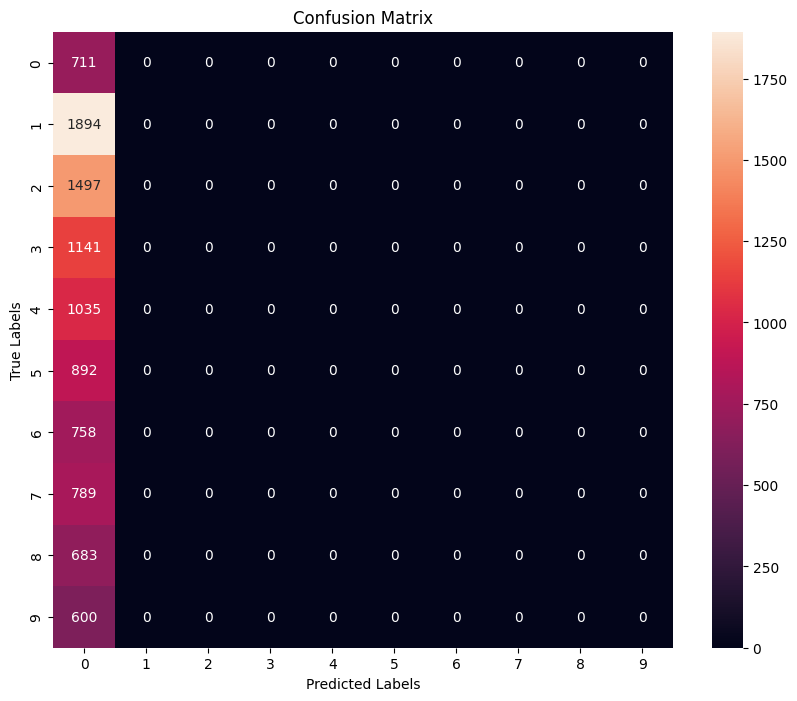

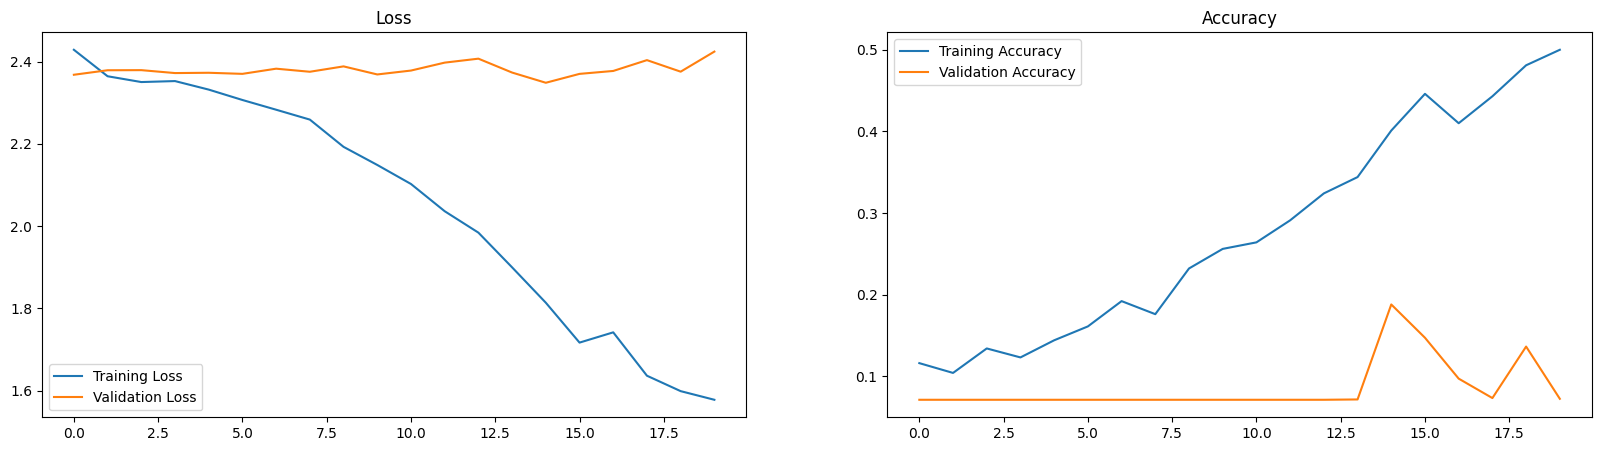

              precision    recall  f1-score   support

           0       0.07      1.00      0.13       711
           1       0.00      0.00      0.00      1894
           2       0.00      0.00      0.00      1497
           3       0.00      0.00      0.00      1141
           4       0.00      0.00      0.00      1035
           5       0.00      0.00      0.00       892
           6       0.00      0.00      0.00       758
           7       0.00      0.00      0.00       789
           8       0.00      0.00      0.00       683
           9       0.00      0.00      0.00       600

    accuracy                           0.07     10000
   macro avg       0.01      0.10      0.01     10000
weighted avg       0.01      0.07      0.01     10000



/home/imhaom/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/imhaom/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/imhaom/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [9]:
batch_size_wa = 64

train_X_norm_wa = train_X.reshape((-1, 32, 32, 3)).astype('float32') / 255.0
test_X_norm_wa = test_X.reshape((-1, 32, 32, 3)).astype('float32') / 255.0

def augment(image, label):
    image = data_augmentation(image)
    return image, label

# Create TensorFlow Dataset objects for both the training and testing sets
train_dataset_wa = tf.data.Dataset.from_tensor_slices((train_X_norm, train_Y_cat))
train_dataset_wa = train_dataset_wa.shuffle(1000).map(augment).batch(batch_size_wa).prefetch(tf.data.AUTOTUNE)

test_dataset_wa = tf.data.Dataset.from_tensor_slices((test_X_norm, test_Y_cat))
test_dataset_wa = test_dataset_wa.batch(batch_size_wa).prefetch(tf.data.AUTOTUNE)

# Initialize the model
model_vgg_wa = CreateVGGModel(10)
print(model_vgg_wa.summary())
model_vgg_wa.compile(
    optimizer=keras.optimizers.Adam(),  # Create a new instance of Adam optimizer
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
# Train the model
start_time = process_time()
history_vgg_wa = model_vgg_wa.fit(
    train_dataset_wa,
    validation_data=test_dataset_wa,
    epochs=100,
    class_weight=class_weight_dict,
    callbacks=[early_stopping],
    verbose=1
)
end_time = process_time()
training_time_wa = end_time - start_time

print(f"Training Time: {training_time_wa}")
# Start timing for inference on training dataset
train_infer_start_time_wa = process_time()
train_predictions_wa = model_vgg_wa.predict(train_dataset_wa)
train_infer_end_time_wa = process_time()

# Training set inference time calculation
train_inference_time_wa = train_infer_end_time_wa - train_infer_start_time_wa
print(f"Inference Time on Training Set: {train_inference_time_wa}")

# Start timing for inference on testing dataset
test_infer_start_time_wa = process_time()
test_predictions_wa = model_vgg_wa.predict(test_dataset_wa)
test_infer_end_time_wa = process_time()

# Testing set inference time calculation
test_inference_time_wa = test_infer_end_time_wa - test_infer_start_time_wa
print(f"Inference Time on Testing Set: {test_inference_time_wa}")

eval_model(model_vgg_wa, history_vgg_wa.history, train_X_norm_wa, train_Y_cat, test_X_norm_wa, test_Y_cat)

#plot_images_dcnn(val_X_split_norm, val_Y_split_cat, model_cnn, num_images=80)
# For your DCNN design, feel free to borrow networks from pracs and lecture examples. The network does not need to be
# overly complex, but you should briefly explain your selection of this model. You should avoid networks so simple 
# that they perform very badly. Look at the lecture notes and the sort of simple DCNNs we've created as a guide. With 
# respect to training time, there is no minimum or maximum training time, but you should either:
#  - Train both your models to convergence, noting that this may take different numbers of epochs
#  - Train your networks for the same period of time, ensuring that this time is sufficient for at least one to converge
# Keep in mind that with the very small training set, you may need to increase the number of epochs compared to what we
# see in the lecture examples

In [23]:
# def plot_images_dcnn_wa(images, labels, data_augmentation, num_images=100):
#     fig = plt.figure(figsize=[20, 25])
#     for i in range(num_images):
#         ax = fig.add_subplot(10, 10, i + 1)
#         # Apply the data augmentation to the image
#         augmented_image = data_augmentation()
#         augmented_image = np.array(augmented_image)[0]  # Convert tensor to numpy array and take the first image
        
#         # Assuming images were originally in grayscale and expanded to 3 channels
#         # Display the image; no need to pick a single channel since we're dealing with color images
#         ax.imshow(augmented_image)
#         if labels is not None:
#             ax.set_title(labels[i])
#         ax.axis("off")
#    plt.show()
# def plot_images_dcnn_wa(images, labels):
#     fig = plt.figure(figsize=[20, 25])
#     for i in range(80):  # Adjust this to plot the number of images you desire
#         ax = fig.add_subplot(10, 8, i + 1)  # Changed from 10, 10 to 10, 8 for 80 images
#         img = images[i].reshape(32, 32, 3)  # Corrected shape for color images
#         ax.imshow(data_augmentation)  # No need to specify cmap='gray' for color images
#         ax.set_title(labels[i])
#         ax.axis('off')
        

In [ ]:
# For your write-up, you should include:
# - briefly mention any pre-processing you did and why
# - outline your network design, and training approach. The discussion of training should note how long the model was trained
#   for, and if it converged. If you observe the non-augmented and augmented networks training at different rates, discuss that
#   here
# - outline your data augmentation, and briefly justify why these methods were chosen.
# - an evaluation and comparison of three models, which should highlight any differences observed between the models, and the
#   inference time of the three models
# Your write-up should be supported by appropriate figures and tables. Figures and tables should have numbers and meaningful captions
#
# SEE THE ASSIGNMENT BRIEF ON CANVAS FOR MORE DETAILS AND NOTE THAT A NOTEBOOK FILE DOES NOT CONSTITUTE A VALID SUBMISSION. 
# YOU SHOULD WRITE UP YOUR RESPONSE IN A SEPARATE DOCUMENT